In [2]:
from PIL import Image
from IPython.display import display

Single imputer report:

Completed several operations working on single daphnia tracking:

Created a class `NPZer` which will unzip and unpack .npz files, the output from TRex, for imputation and transformation

Created a class `TRexDataCleaner` which removes disjoint data points, i.e., large jumps in position, missing data, etc.

Created a class `TRexImputer` which creates a framework for employing different imputation strategies on missing daphina tracking, currently only with an avgValue function

Created easy plotting functions for displaying daphnia tracking

Created framework for estimating maximum daphnia velocity used in data cleaning and imputation




# Walkthrough of imputation process: 

#  NPZer.py

## `NPZer.py` holds the class `NPZer` which is used to unzip a .npz file (output of TRex tracking). This data can be directly converted to a pandas table and subsequently to a .csv file or plotted 

## Example Usage:

In [4]:
# Import necessary tools
import pandas as pd
import numpy as np
from src.data_manipulation.NPZer import NPZer

NPZer = NPZer()

# Set desired parameters
SOURCE_DIR = 'data/clean_fish_data/fish_data_clean.csv'
INVERT_Y = True
PARAMS = ['time', 'X', 'Y']

In [ ]:
# Unzip and turn data into a pandas table
unzippedData = NPZer.pandafy(source_dir=SOURCE_DIR,
                              invertY=INVERT_Y,
                              params=PARAMS)

In [ ]:
# Print data in form of pandas table
print('TRex Data:\n', unzippedData)

### Output

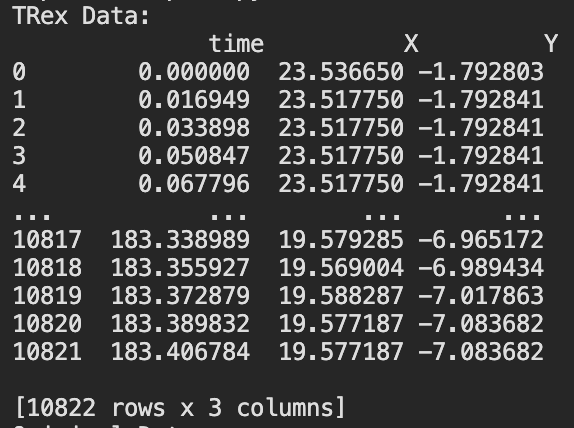

In [4]:
display(Image.open('output_images/NPZer_output.png'))

#  TRexDataCleaner.py

## `TRexDataCleaner.py` holds the class `TRexDataCleaner` which is used to clean disjoint data in TRex tracking data for later imputation, i.e., disjoint data points are rendered as `np.inf`

## Example Usage

In [ ]:
# Import necessary tools
from src.data_manipulation.TRexDataCleaner import TRexDataCleaner

dataCleaner = TRexDataCleaner()

# Set desired parameters
VMAX = 1

In [ ]:
# Set sample of original data
originalData = unzippedData[:25]

# Print sample of original data
print('Original Data:\n', originalData)

In [ ]:
# Clean data
cleanedData, removedData = dataCleaner.renderDiscontinuities(data=originalData, vmax=25)

# Print cleaned data
print('Cleaned Data:\n', cleanedData)

### Output

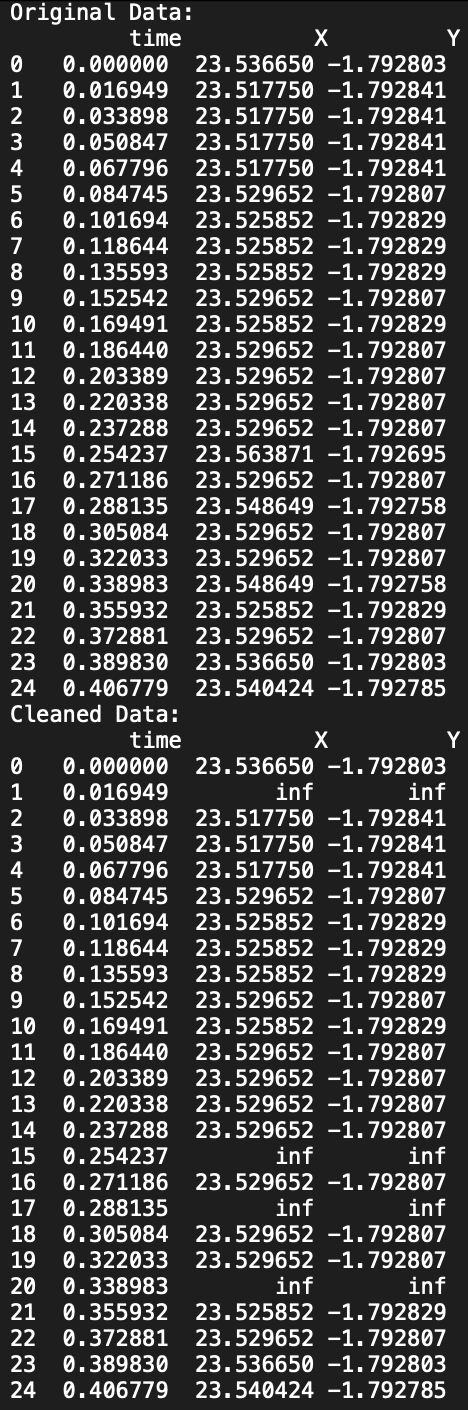

In [5]:
display(Image.open('output_images/TRexDataCleaner_output.png'))

#  TRexImputer.py

# `TRexImputer.py` holds the class `TRexImputer` which is used to impute/fill in discontinuous TRex data with a desired `impute` function. This should be used with data already cleaned with `TRexDataCleaner`

## Example Usage

In [ ]:
# Import necessary tools
from src.data_manipulation.TRexImputer import TRexImputer

imputer = TRexImputer()

# Set desired parameters
DATA = cleanedData
FUNCTION = 'avgValue'

In [ ]:
# Print original data
print('Original Data:\n', cleanedData)

In [ ]:
# Impute data
imputedData = imputer.impute(data=DATA, function=FUNCTION)

# Print imputed data
print('Imputed Data:\n', imputedData)

### Output

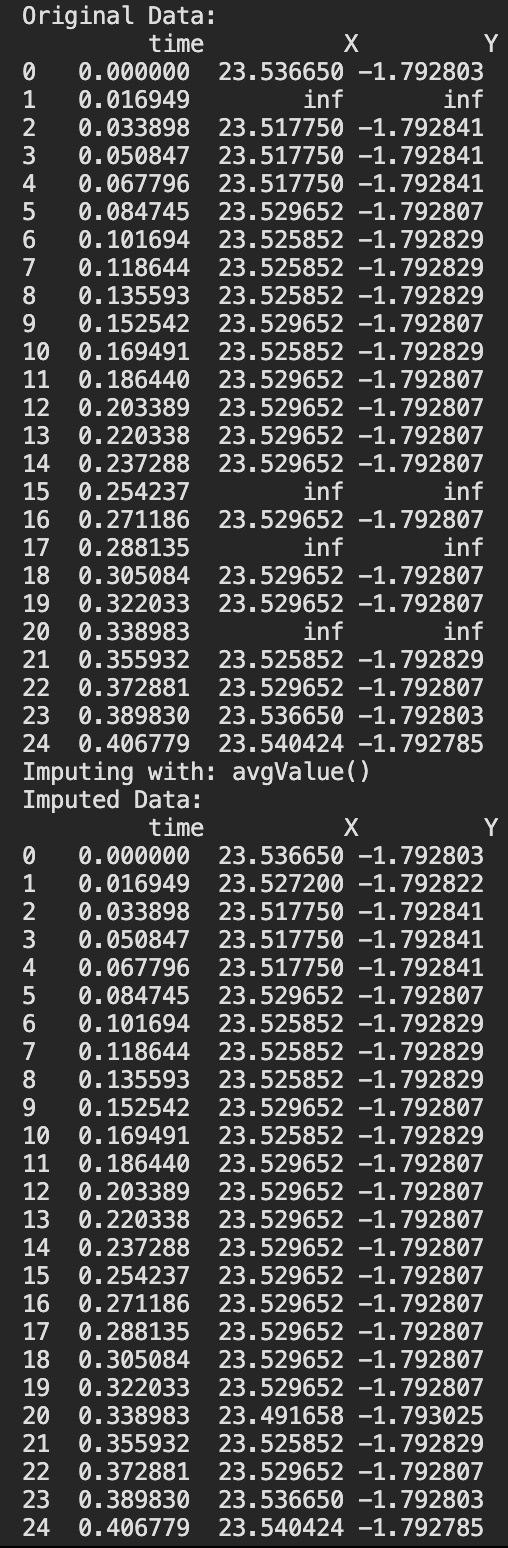

In [6]:
display(Image.open('output_images/TRexImputer_output.png'))

# avgValue.py

## `avgValue.py` holds the `impute` function which imputes data in between gaps of discontinuous points. The function calculates the velocity between each gap of data, and imputes the respective points according it.

## Example usage
### Usage is shown in above example as `FUNCTION = 'avgValue'`

# plotDetail.py

# `plotDetail.py` holds the `plotDetail` function which can take in a CSV or an NPZ file, and after you declare the X, Y, and time values, plots a graph with placeholder labels representing a path of the Daphnia's movements. 

# Example usage

In [ ]:
# Import necessary tools
from src.data_manipulation.plotDetail import plotDetail
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Copy the path of the NPZ file
npz_path = r"/Users/ibrahimrahat/Documents/GitHub/daphnia/data/npz_file/single_7_9_fish1.MP4_fish0.npz"

# Use np.load to load the npz file
data = np.load(npz_path)

In [ ]:
# Declare X, Y, and time columns
X = data['X']
Y = data['Y']
timestamp = data['timestamp']

# Use pandas to enter values into a dataframe
df = pd.DataFrame(
    {
        "X": X,
        "Y": Y,
        "time": timestamp
    }
)

In [ ]:
# Plots a graph of the Daphnia's movements
plotDetail(df, invert_y=False)

# Output

# avg_velocity.py

# `avg_velocity.py` holds the `all_velocity` function which calculates the average velocities of one coordinate and the next, for all coordinates and holds them all in a vector. This file also holds the function plot_histogram which creates and plots a histogram showing the frequency of each average velocity found.

# Example usage

In [ ]:
# Import necessary tools
import pytest
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from missing_data_dev.max_velocity.avg_velocity import calc_velocity, avg_velocity, all_velocity, plot_histogram

# Create and declare the directory for all the CSV files
direct_path = "/Users/ibrahimrahat/Documents/GitHub/daphnia/data/table_data"
all_files = os.listdir(direct_path)

In [ ]:
# Create an empty dataframe
dataframes = []

# Loop through and have pandas read each CSV file
for file in all_files:
    file_path = os.path.join(direct_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

In [ ]:
# Use the function all_velocity and store all the velocities into a variable
all_velo = all_velocity(dataframes)

# Plot the velocities in a histogram
plot_histogram(all_velo)

# Output